## Reading the dataset

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Lab 4/DIstanceTimeDataset - Sheet1.csv")

In [ ]:
df.head()

,Location Name,Time to Reach (hr),Distance (km),Train Only,Road Only,Train+Road,Unnamed: 6,Legend,Unnamed: 8
0,surat,18.0,1020,1,0,0,NaN,Train,0 or 1
1,Kolkata,18.0,870,0,0,1,NaN,Road,0 or 1
2,Hyderabad,13.5,676,0,0,1,NaN,Train+Road,0 or 1
3,Hyderabad,13.5,680,0,0,1,NaN,You may fill more than 1 entry if the mode of ...,NaN
4,Delhi,18.0,977,1,0,0,NaN,NaN,NaN


## Cleaning the dataset

In [ ]:
cols = df.columns.tolist()

In [ ]:
cols

['Location Name',
 'Time to Reach (hr)',
 'Distance (km)',
 'Train Only',
 'Road Only',
 'Train+Road',
 'Unnamed: 6',
 'Legend',
 'Unnamed: 8']

In [ ]:
df = df.drop(columns=[cols[len(cols)-1],cols[len(cols)-2],cols[len(cols)-3]])

In [ ]:
df

,Location Name,Time to Reach (hr),Distance (km),Train Only,Road Only,Train+Road
0,surat,18.00,1020,1,0,0
1,Kolkata,18.00,870,0,0,1
2,Hyderabad,13.50,676,0,0,1
3,Hyderabad,13.50,680,0,0,1
4,Delhi,18.00,977,1,0,0
5,visakhapatnam,14.00,580,0,0,1
6,new delhi,18.00,977,0,0,1
7,Anand,21.00,1157,1,0,0
8,Rewari(Haryana),26.00,1264,1,0,0
9,Nashik( Maharashtra),15.00,861,1,0,0


## Scatter Plot between the distance and the time taken

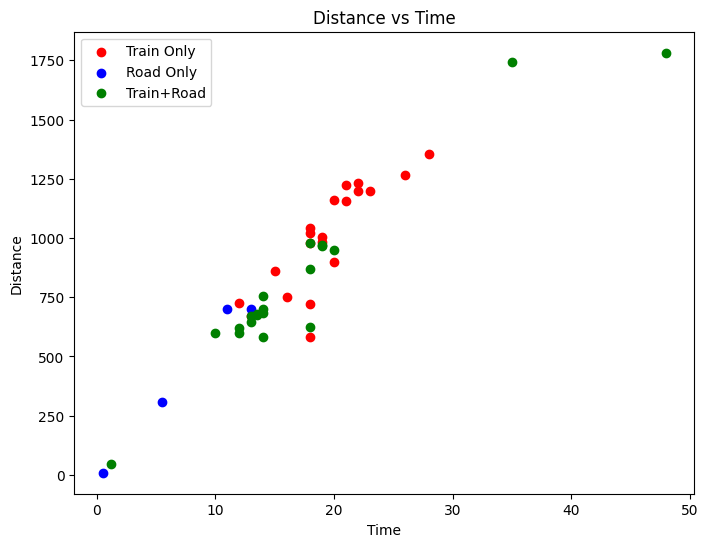

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df.loc[df["Train Only"] == 1, "Time to Reach (hr)"], df.loc[df["Train Only"] == 1, "Distance (km)"], color="red", label="Train Only")
plt.scatter(df.loc[df["Road Only"]==1,"Time to Reach (hr)"], df.loc[df["Road Only"]==1,"Distance (km)"],color="blue",label="Road Only")
plt.scatter(df.loc[df["Train+Road"]==1,"Time to Reach (hr)"], df.loc[df["Train+Road"]==1,"Distance (km)"],color="green",label="Train+Road")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.title("Distance vs Time")
plt.legend()
plt.show()

## Calculation of parameters vector for whole dataset

In [ ]:
time = df[cols[1]]
distance = df[cols[2]]

In [ ]:
time

,Time to Reach (hr)
0,18.00
1,18.00
2,13.50
3,13.50
4,18.00
5,14.00
6,18.00
7,21.00
8,26.00
9,15.00


In [ ]:
distance

,Distance (km)
0,1020
1,870
2,676
3,680
4,977
5,580
6,977
7,1157
8,1264
9,861


In [ ]:
data_matrix = np.column_stack((np.ones(len(df)), time))

In [ ]:
distance_vector = distance.values

In [ ]:
distance_vector

array([1020,  870,  676,  680,  977,  580,  977, 1157, 1264,  861,  669,
         44,    9,  756, 1743,  970, 1044,  727,  683, 1200,  750, 1225,
        700,  309,  600,  949,  600, 1782,  700,  720,  620,  965,  982,
        624, 1354, 1200, 1006,  900,  646,  584,  700, 1159, 1230])

In [ ]:
data_matrix

array([[ 1.  , 18.  ],
       [ 1.  , 18.  ],
       [ 1.  , 13.5 ],
       [ 1.  , 13.5 ],
       [ 1.  , 18.  ],
       [ 1.  , 14.  ],
       [ 1.  , 18.  ],
       [ 1.  , 21.  ],
       [ 1.  , 26.  ],
       [ 1.  , 15.  ],
       [ 1.  , 13.  ],
       [ 1.  ,  1.25],
       [ 1.  ,  0.5 ],
       [ 1.  , 14.  ],
       [ 1.  , 35.  ],
       [ 1.  , 19.  ],
       [ 1.  , 18.  ],
       [ 1.  , 12.  ],
       [ 1.  , 14.  ],
       [ 1.  , 22.  ],
       [ 1.  , 16.  ],
       [ 1.  , 21.  ],
       [ 1.  , 13.  ],
       [ 1.  ,  5.47],
       [ 1.  , 10.  ],
       [ 1.  , 20.  ],
       [ 1.  , 12.  ],
       [ 1.  , 48.  ],
       [ 1.  , 11.  ],
       [ 1.  , 18.  ],
       [ 1.  , 12.  ],
       [ 1.  , 19.  ],
       [ 1.  , 19.  ],
       [ 1.  , 18.  ],
       [ 1.  , 28.  ],
       [ 1.  , 23.  ],
       [ 1.  , 19.  ],
       [ 1.  , 20.  ],
       [ 1.  , 13.  ],
       [ 1.  , 18.  ],
       [ 1.  , 14.  ],
       [ 1.  , 20.  ],
       [ 1.  , 22.  ]])

In [ ]:

omega_hat = np.linalg.inv(((data_matrix.T)@data_matrix))@((data_matrix.T)@distance_vector)

In [ ]:
omega_hat

array([135.63443142,  42.22130654])

## Calculation of parameters vector for road network only

In [ ]:
filtered_time = df.loc[df["Road Only"]==1,"Time to Reach (hr)"]f

In [ ]:
filtered_time

,Time to Reach (hr)
12,0.50
22,13.00
23,5.47
28,11.00


In [ ]:
road_network_data_matrix = np.column_stack((np.ones(len(filtered_time)), filtered_time))

In [ ]:
road_network_data_matrix

array([[ 1.  ,  0.5 ],
       [ 1.  , 13.  ],
       [ 1.  ,  5.47],
       [ 1.  , 11.  ]])

In [ ]:
road_network_distance_vector = df.loc[df["Road Only"]==1,"Distance (km)"].values

In [ ]:
road_network_distance_vector

array([  9, 700, 309, 700])

In [ ]:
omega_hat_road_network = (np.linalg.inv(road_network_data_matrix.T@road_network_data_matrix))@((road_network_data_matrix.T)@road_network_distance_vector)

In [ ]:
omega_hat_road_network

array([-11.06834871,  58.80124774])

## Verification of orthogonality between the error vector and the column space of the data matrix

In [ ]:
distance_hat = (data_matrix@omega_hat)

In [ ]:
distance_hat

array([ 895.6179492 ,  895.6179492 ,  705.62206975,  705.62206975,
        895.6179492 ,  726.73272302,  895.6179492 , 1022.28186882,
       1233.38840154,  768.95402957,  684.51141648,  188.4110646 ,
        156.74508469,  726.73272302, 1613.38016043,  937.83925574,
        895.6179492 ,  642.29010994,  726.73272302, 1064.50317537,
        811.17533611, 1022.28186882,  684.51141648,  366.58497821,
        557.84749685,  980.06056228,  642.29010994, 2162.25714549,
        600.06880339,  895.6179492 ,  642.29010994,  937.83925574,
        937.83925574,  895.6179492 , 1317.83101463, 1106.72448191,
        937.83925574,  980.06056228,  684.51141648,  895.6179492 ,
        726.73272302,  980.06056228, 1064.50317537])

In [ ]:
error_vector = distance_vector - distance_hat

In [ ]:
error_vector

array([ 124.3820508 ,  -25.6179492 ,  -29.62206975,  -25.62206975,
         81.3820508 , -146.73272302,   81.3820508 ,  134.71813118,
         30.61159846,   92.04597043,  -15.51141648, -144.4110646 ,
       -147.74508469,   29.26727698,  129.61983957,   32.16074426,
        148.3820508 ,   84.70989006,  -43.73272302,  135.49682463,
        -61.17533611,  202.71813118,   15.48858352,  -57.58497821,
         42.15250315,  -31.06056228,  -42.29010994, -380.25714549,
         99.93119661, -175.6179492 ,  -22.29010994,   27.16074426,
         44.16074426, -271.6179492 ,   36.16898537,   93.27551809,
         68.16074426,  -80.06056228,  -38.51141648, -311.6179492 ,
        -26.73272302,  178.93943772,  165.49682463])

In [ ]:
isPerpendicular = (data_matrix.T)@error_vector

In [ ]:
first = isPerpendicular[0]
second = isPerpendicular[1]

In [ ]:
if first!=0 or second!=0:
  print("Not Perpendicular")
else:
  print("Perpendicular")

Not Perpendicular


## Visualization of the dataset in terms of categories like road only, train only and train+road

<ipython-input-63-57b19d261c04>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category")


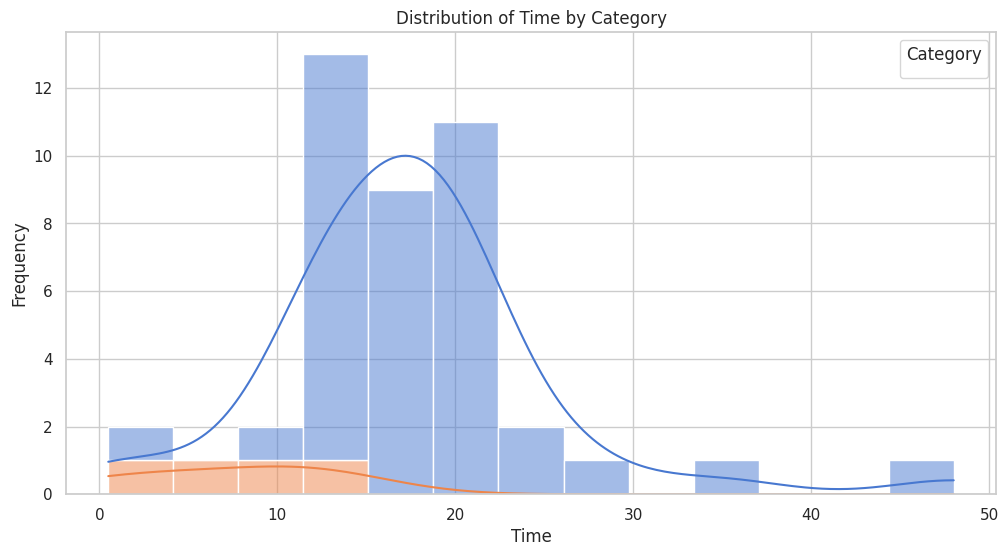

<ipython-input-63-57b19d261c04>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category")


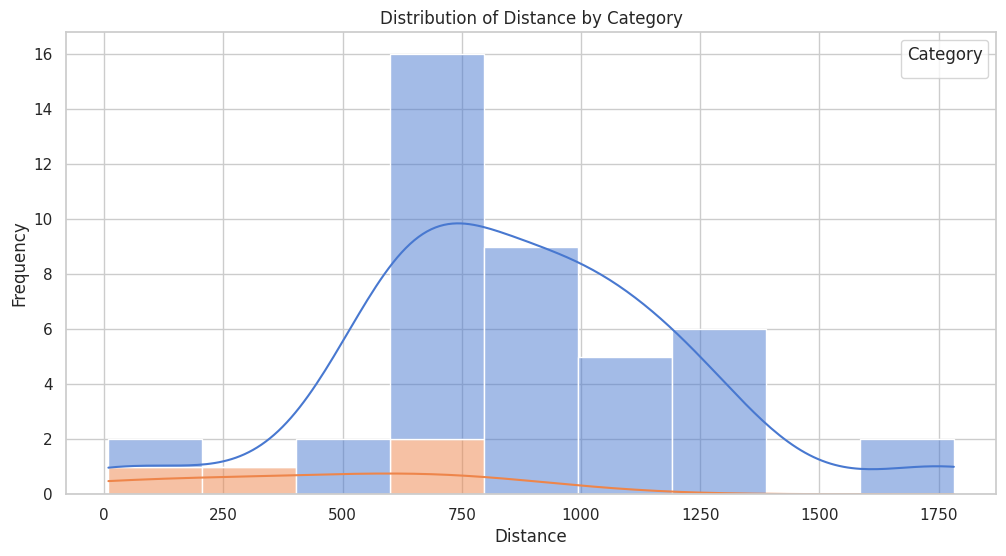

<ipython-input-63-57b19d261c04>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Road Only", y="Time to Reach (hr)", palette="pastel")


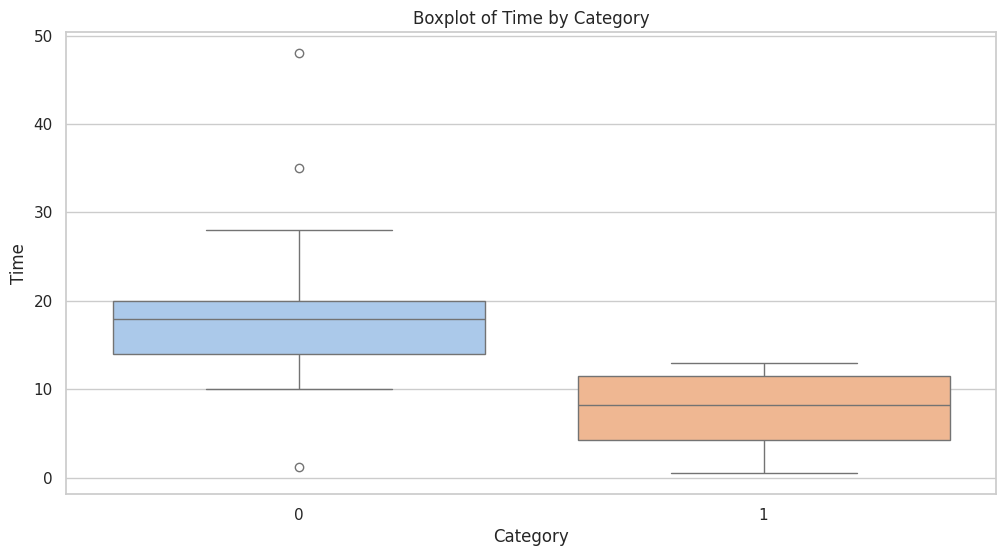

<ipython-input-63-57b19d261c04>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Road Only", y="Distance (km)", palette="pastel")


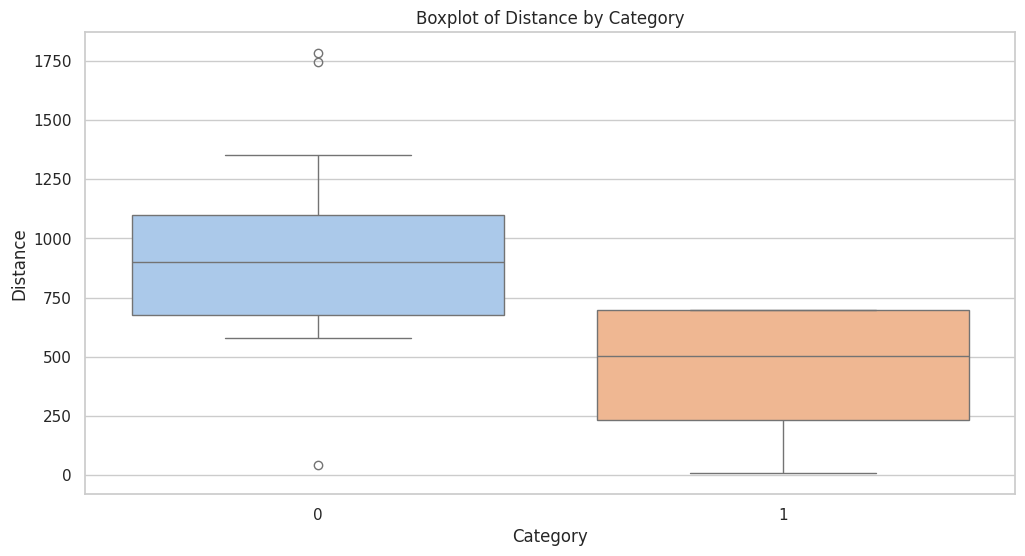

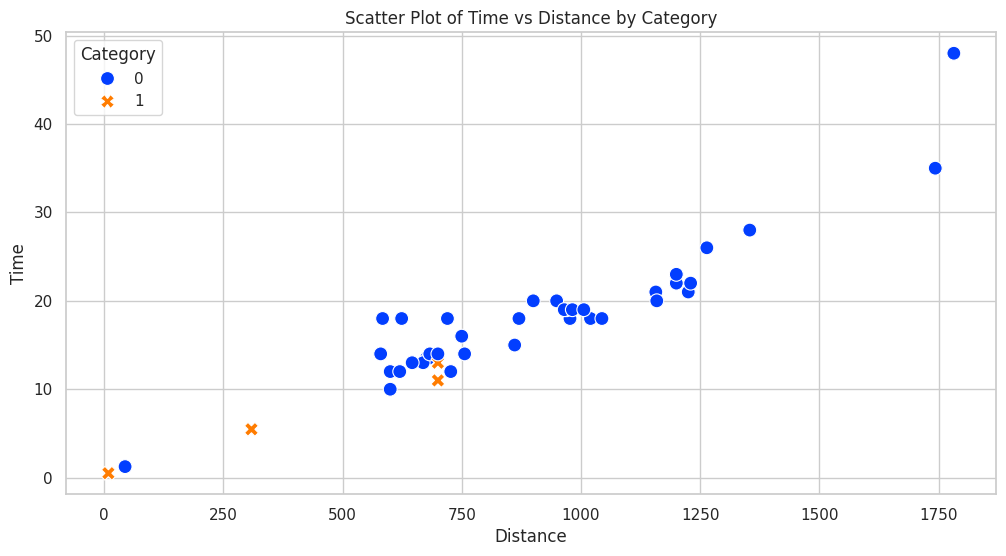

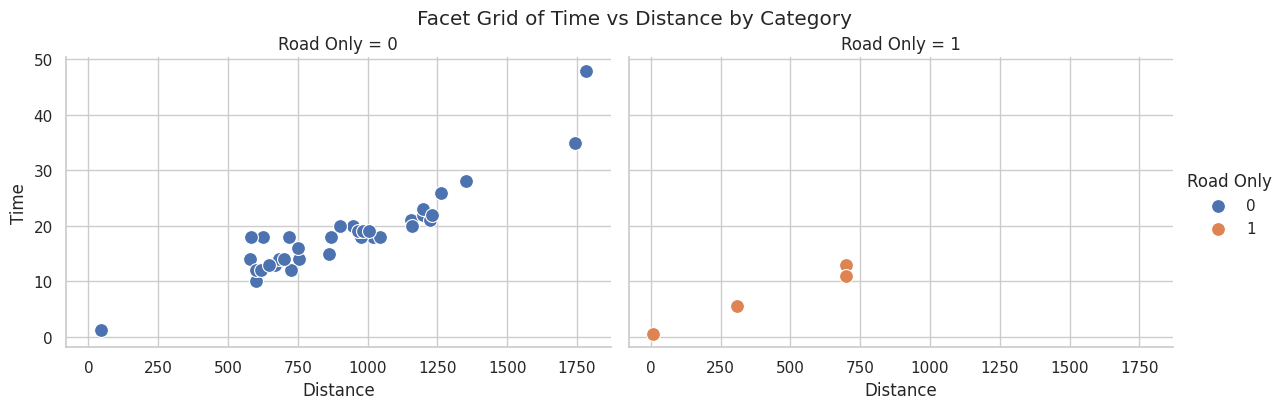

In [ ]:
sns.set_theme(style="whitegrid")

# 1. Distribution plots for "time" and "distance" by category
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Time to Reach (hr)", hue="Road Only", kde=True, multiple="stack", palette="muted")
plt.title("Distribution of Time by Category")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend(title="Category")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Distance (km)", hue="Road Only", kde=True, multiple="stack", palette="muted")
plt.title("Distribution of Distance by Category")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend(title="Category")
plt.show()

# 2. Boxplots for "time" and "distance" by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Road Only", y="Time to Reach (hr)", palette="pastel")
plt.title("Boxplot of Time by Category")
plt.xlabel("Category")
plt.ylabel("Time")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Road Only", y="Distance (km)", palette="pastel")
plt.title("Boxplot of Distance by Category")
plt.xlabel("Category")
plt.ylabel("Distance")
plt.show()

# 3. Scatter plot of "time" vs "distance" colored by category
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Distance (km)", y="Time to Reach (hr)", hue="Road Only", style="Road Only", palette="bright", s=100)
plt.title("Scatter Plot of Time vs Distance by Category")
plt.xlabel("Distance")
plt.ylabel("Time")
plt.legend(title="Category")
plt.show()

# 4. Facet grid of scatter plots for each category
g = sns.FacetGrid(df, col="Road Only", hue="Road Only", height=4, aspect=1.5, palette="deep")
g.map(sns.scatterplot, "Distance (km)", "Time to Reach (hr)", s=100)
g.add_legend()
g.set_axis_labels("Distance", "Time")
g.fig.suptitle("Facet Grid of Time vs Distance by Category", y=1.02)
plt.show()


<ipython-input-64-fc49be136384>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category")


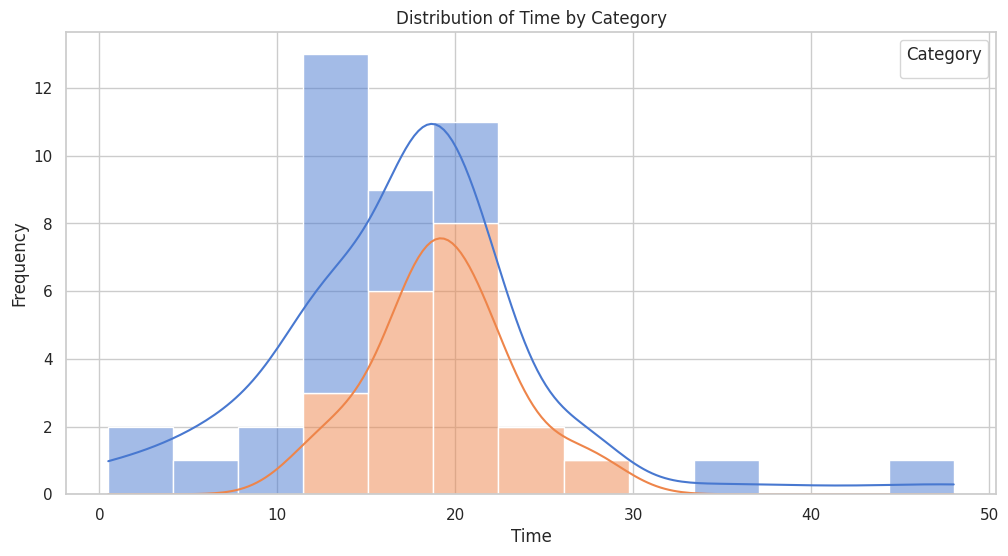

<ipython-input-64-fc49be136384>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category")


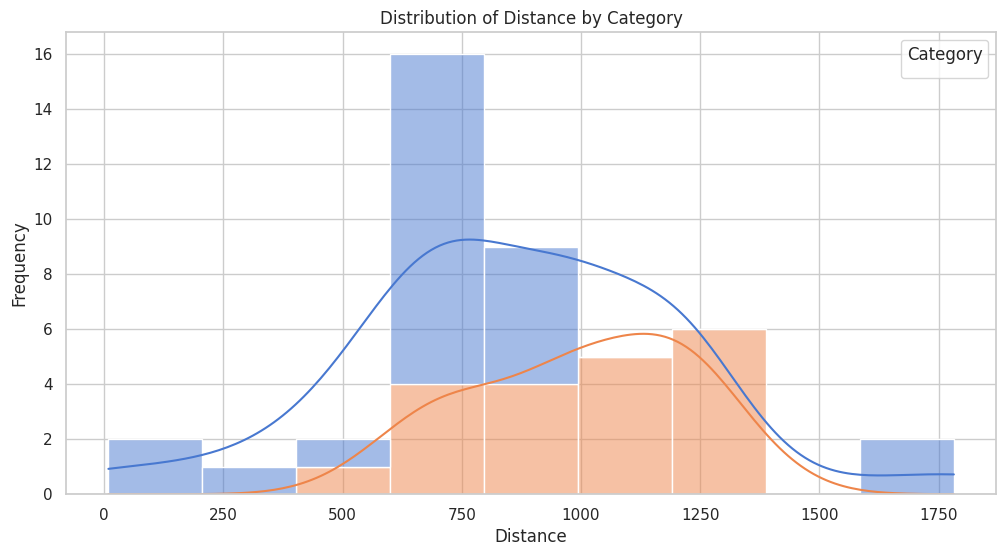

<ipython-input-64-fc49be136384>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Train Only", y="Time to Reach (hr)", palette="pastel")


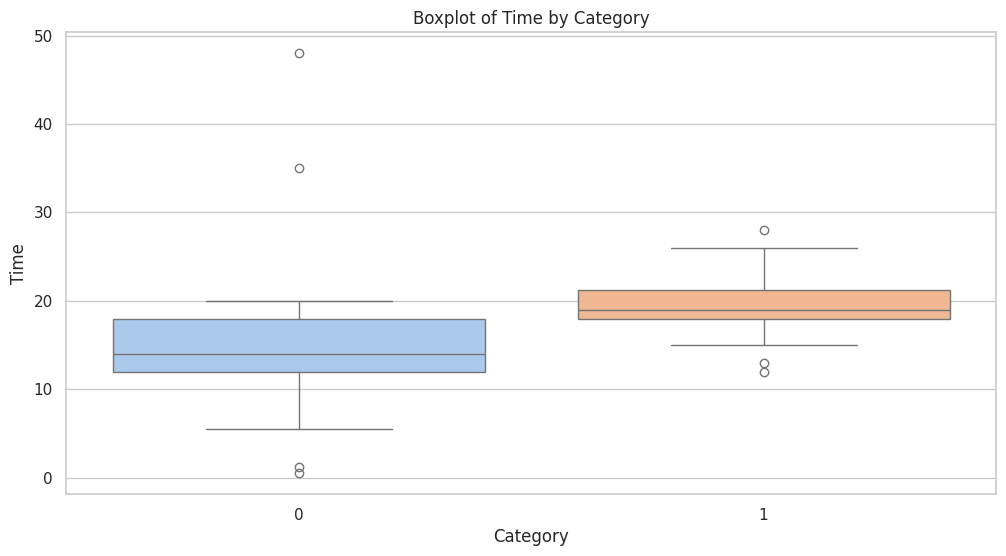

<ipython-input-64-fc49be136384>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Road Only", y="Distance (km)", palette="pastel")


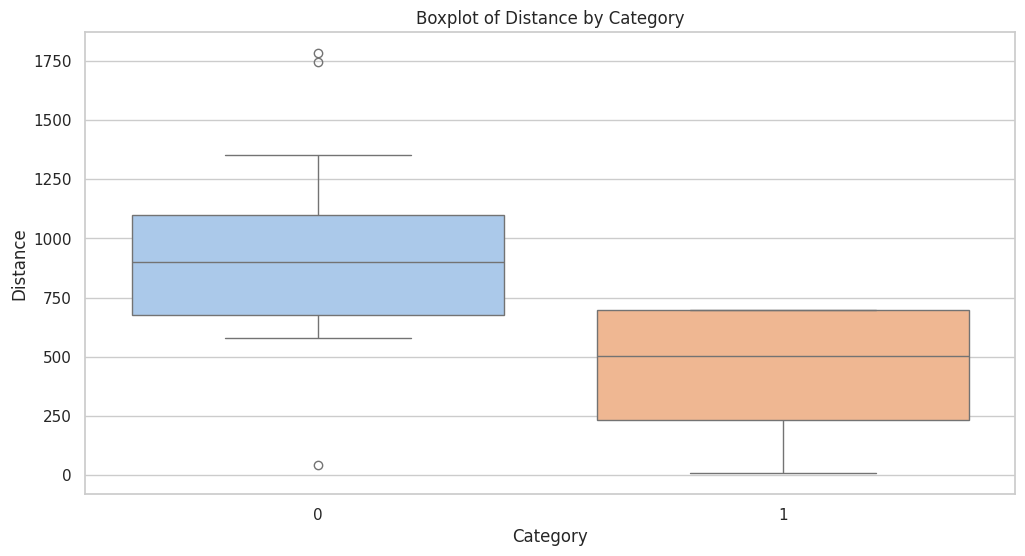

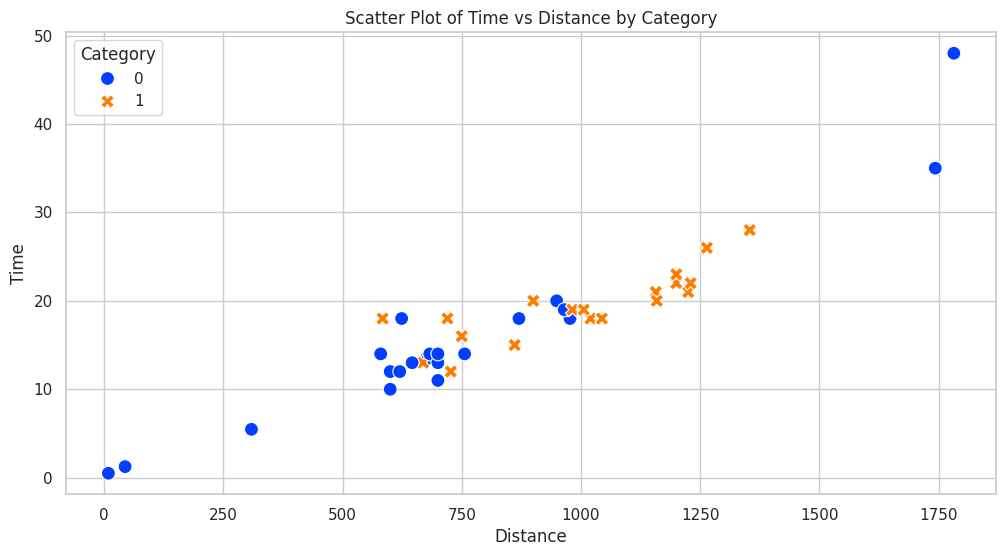

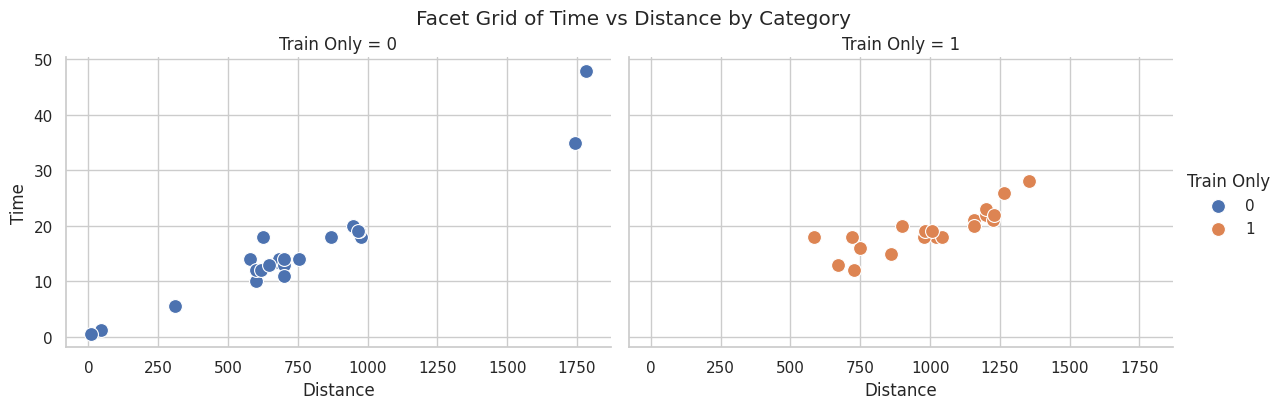

In [ ]:
sns.set_theme(style="whitegrid")

# 1. Distribution plots for "time" and "distance" by category
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Time to Reach (hr)", hue="Train Only", kde=True, multiple="stack", palette="muted")
plt.title("Distribution of Time by Category")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend(title="Category")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Distance (km)", hue="Train Only", kde=True, multiple="stack", palette="muted")
plt.title("Distribution of Distance by Category")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend(title="Category")
plt.show()

# 2. Boxplots for "time" and "distance" by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Train Only", y="Time to Reach (hr)", palette="pastel")
plt.title("Boxplot of Time by Category")
plt.xlabel("Category")
plt.ylabel("Time")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Road Only", y="Distance (km)", palette="pastel")
plt.title("Boxplot of Distance by Category")
plt.xlabel("Category")
plt.ylabel("Distance")
plt.show()

# 3. Scatter plot of "time" vs "distance" colored by category
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Distance (km)", y="Time to Reach (hr)", hue="Train Only", style="Train Only", palette="bright", s=100)
plt.title("Scatter Plot of Time vs Distance by Category")
plt.xlabel("Distance")
plt.ylabel("Time")
plt.legend(title="Category")
plt.show()

# 4. Facet grid of scatter plots for each category
g = sns.FacetGrid(df, col="Train Only", hue="Train Only", height=4, aspect=1.5, palette="deep")
g.map(sns.scatterplot, "Distance (km)", "Time to Reach (hr)", s=100)
g.add_legend()
g.set_axis_labels("Distance", "Time")
g.fig.suptitle("Facet Grid of Time vs Distance by Category", y=1.02)
plt.show()


<ipython-input-65-49a3cd7664bb>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category")


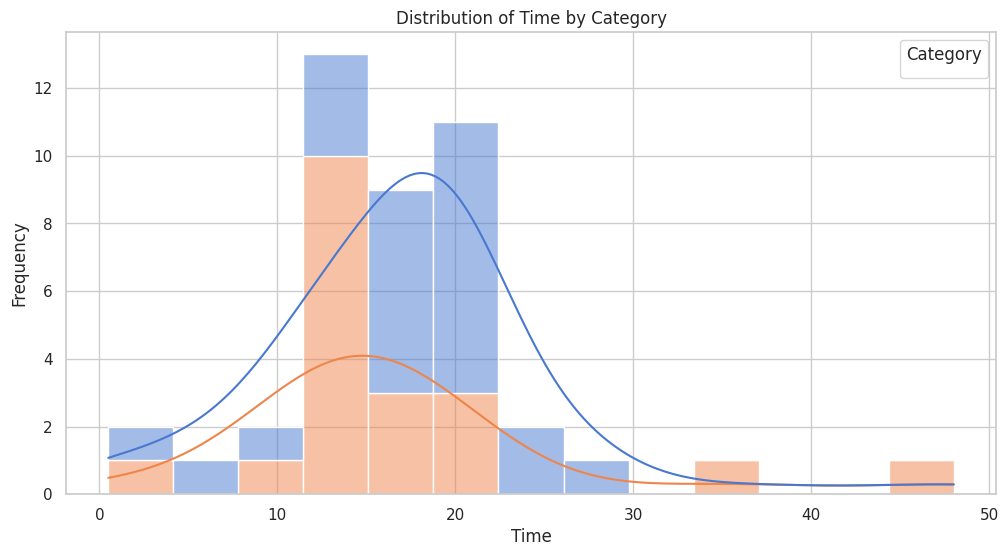

<ipython-input-65-49a3cd7664bb>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category")


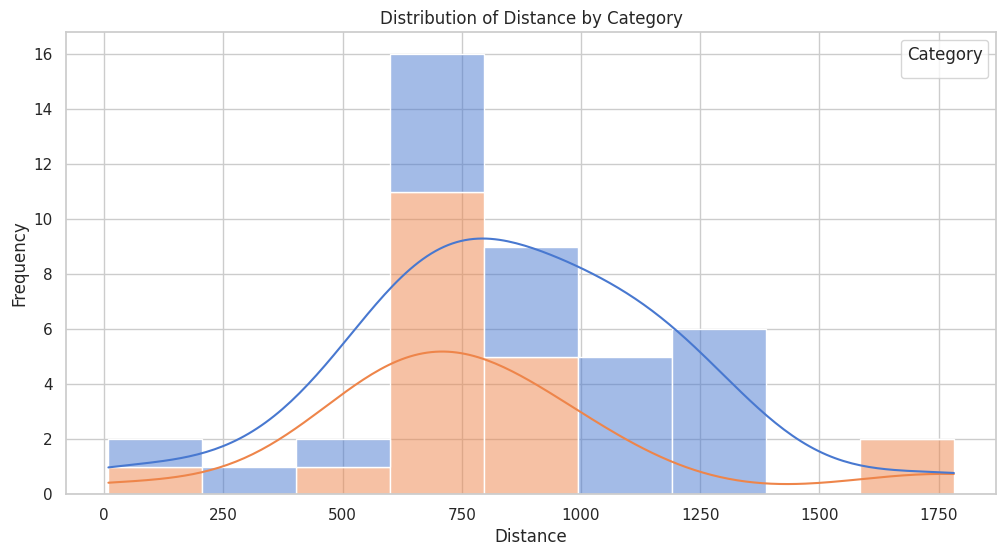

<ipython-input-65-49a3cd7664bb>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Train+Road", y="Time to Reach (hr)", palette="pastel")


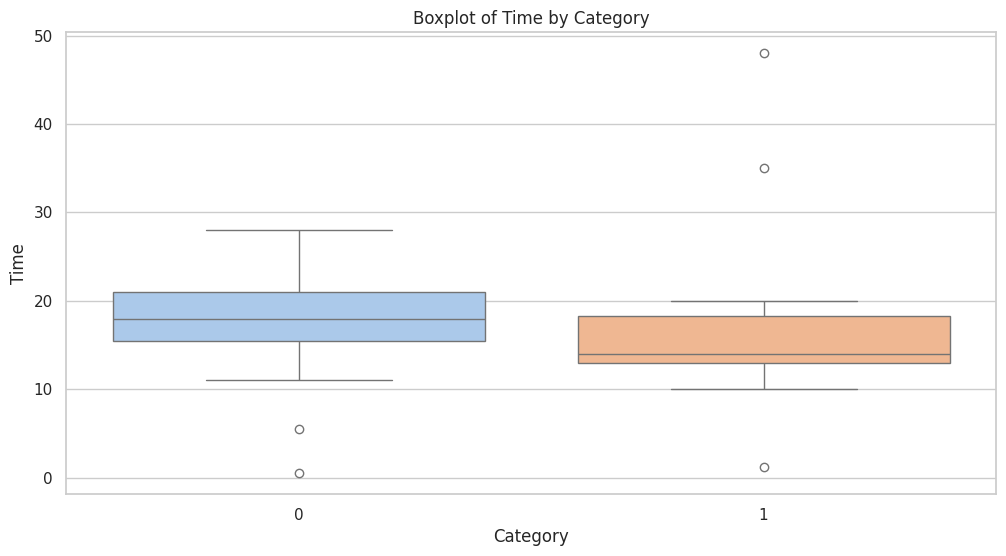

<ipython-input-65-49a3cd7664bb>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Train+Road", y="Distance (km)", palette="pastel")


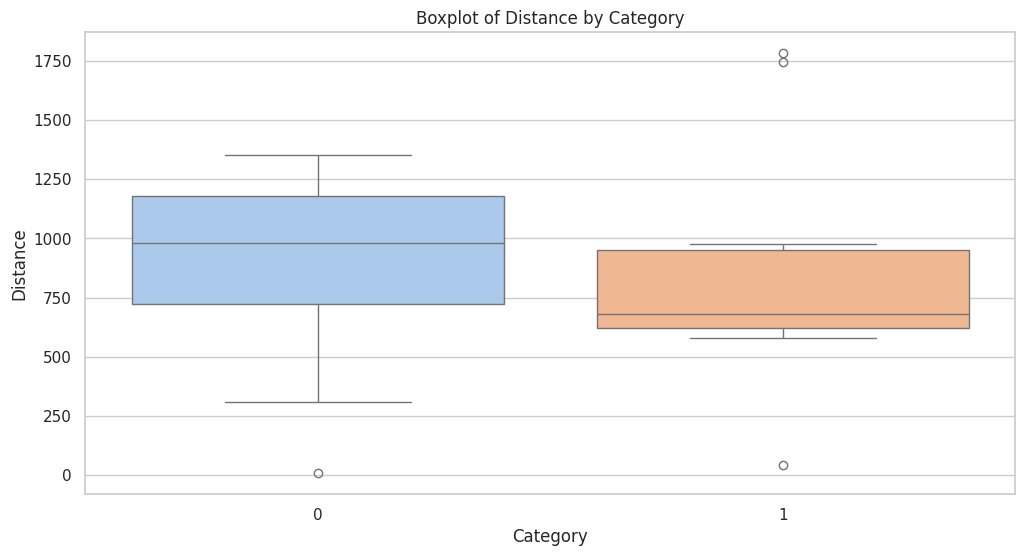

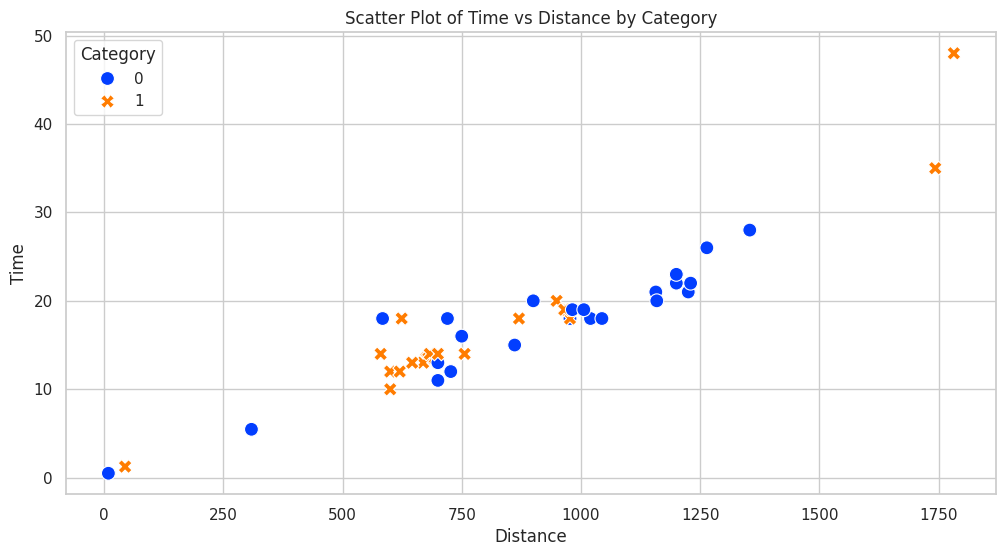

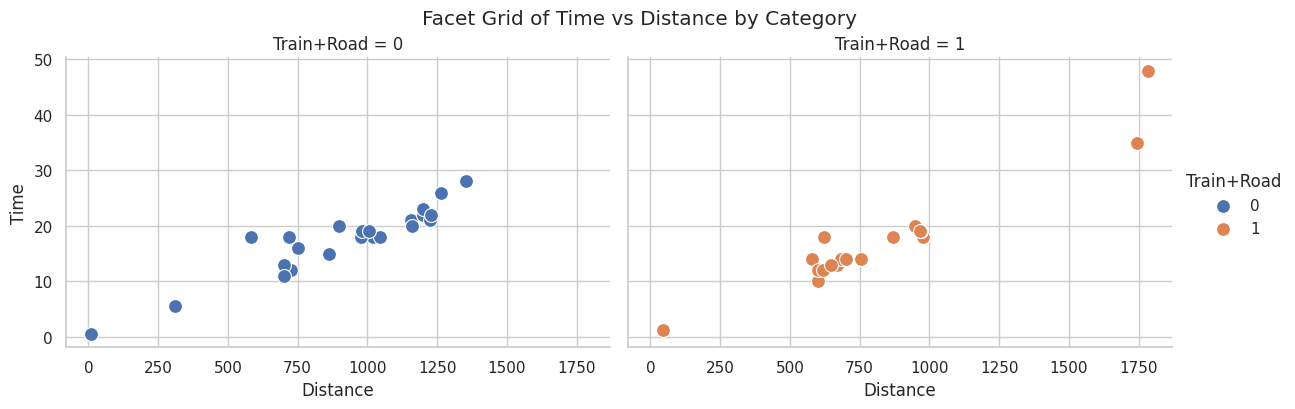

In [ ]:
sns.set_theme(style="whitegrid")

# 1. Distribution plots for "time" and "distance" by category
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Time to Reach (hr)", hue="Train+Road", kde=True, multiple="stack", palette="muted")
plt.title("Distribution of Time by Category")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend(title="Category")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Distance (km)", hue="Train+Road", kde=True, multiple="stack", palette="muted")
plt.title("Distribution of Distance by Category")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend(title="Category")
plt.show()

# 2. Boxplots for "time" and "distance" by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Train+Road", y="Time to Reach (hr)", palette="pastel")
plt.title("Boxplot of Time by Category")
plt.xlabel("Category")
plt.ylabel("Time")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Train+Road", y="Distance (km)", palette="pastel")
plt.title("Boxplot of Distance by Category")
plt.xlabel("Category")
plt.ylabel("Distance")
plt.show()

# 3. Scatter plot of "time" vs "distance" colored by category
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Distance (km)", y="Time to Reach (hr)", hue="Train+Road", style="Train+Road", palette="bright", s=100)
plt.title("Scatter Plot of Time vs Distance by Category")
plt.xlabel("Distance")
plt.ylabel("Time")
plt.legend(title="Category")
plt.show()

# 4. Facet grid of scatter plots for each category
g = sns.FacetGrid(df, col="Train+Road", hue="Train+Road", height=4, aspect=1.5, palette="deep")
g.map(sns.scatterplot, "Distance (km)", "Time to Reach (hr)", s=100)
g.add_legend()
g.set_axis_labels("Distance", "Time")
g.fig.suptitle("Facet Grid of Time vs Distance by Category", y=1.02)
plt.show()
